In [2]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
import pymysql
import pandas as pd
import plotly as px
#MYSQL 연결하기
report_db =pymysql.connect(host='xxx.xxx.xx.xx',user='root',password='xxxxx',db='report_old_data',charset='utf8',autocommit=True,cursorclass=pymysql.cursors.DictCursor)

cursor = report_db.cursor(pymysql.cursors.DictCursor)
sql = "SELECT * FROM bssm_nt_led_status_hist_20221101_20221130;"
cursor.execute(sql)
result = cursor.fetchall()
#result1 = result.query('"2022-05-01 00:00:00"<= hist_dt <= "2022-06-01 00:00:00"')

result = pd.DataFrame(result)
result
###################################################################################
data_main = result
data1 = data_main

data1

,gid,did,mid,hist_dt,building_id,onoff,level,colortemp,hue,saturation,brightness,x,y,r,g,b,report_uspace_yn,operator
0,1,41,0,2022-11-01 00:00:19.064,101,1,30,NaN,None,None,None,None,None,None,None,None,N,scenario
1,1,41,0,2022-11-01 00:00:33.283,101,1,30,NaN,None,None,None,None,None,None,None,None,N,scenario
2,1,41,0,2022-11-01 00:00:35.035,101,1,30,NaN,None,None,None,None,None,None,None,None,N,scenario
3,1,41,0,2022-11-01 00:00:52.820,101,1,30,NaN,None,None,None,None,None,None,None,None,N,scenario
4,1,41,0,2022-11-01 00:01:14.165,101,1,30,NaN,None,None,None,None,None,None,None,None,N,scenario
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24919775,6,127,0,2022-11-30 23:35:02.385,101,1,100,NaN,None,None,None,None,None,None,None,None,Y,None
24919776,6,127,0,2022-11-30 23:40:02.385,101,1,100,NaN,None,None,None,None,None,None,None,None,Y,None
24919777,6,127,0,2022-11-30 23:45:02.385,101,1,100,NaN,None,None,None,None,None,None,None,None,Y,None
24919778,6,127,0,2022-11-30 23:50:02.385,101,1,100,NaN,None,None,None,None,None,None,None,None,Y,None


DB 내에서 불러온 조명 데이터를 특정 조건으로 sorting 해준다

In [1]:
data2 = data1.query('"2022-11-01 00:00:00"<= hist_dt <= "2022-11-30 23:59:00"')
df_ex = data2[data2['onoff'] == 1]                                                # onoff 가 1인 것만, 
#df_ex2 = df_ex[df_ex['report_uspace_yn'] == 'Y']                                  # report_data, 주기적으로 기록 되는 정기 데이터만 가져 올 수 있도록
#df_ex3 = df_ex2[df_ex2['DID'] == 3]                                                
df_ex_final = df_ex.reset_index(drop=True) # index 정리
#df_ex_final.tail(300)
df_ex_final
df1 = df_ex_final
df1
df1_report1 = df1

df1_report1

NameError: name 'data1' is not defined

In [44]:
report_db =pymysql.connect(host='xxx.xxx.xx.xx',user='root',password='xxxxx',db='SmartLight_compensation_data',charset='utf8',autocommit=True,cursorclass=pymysql.cursors.DictCursor)
cursor = report_db.cursor(pymysql.cursors.DictCursor)
sql = "SELECT * FROM raw_by_usage_20221101_20221130;"
cursor.execute(sql)
resultx = cursor.fetchall()
resultx = pd.DataFrame(resultx)

resultx
 

,USE_DATETIME,GID,DID,CHANNEL,ACTIVE_POWER,ACTIVE_CURRENT,ACTIVE_VOLTAGE,PF,POWER_USAGE,ACC_POWER_USAGE
0,2022-11-01 00:00:00,64000,1,1,68.505,None,None,NaN,1.033,402630.466
1,2022-11-01 00:00:00,64001,1,1,73.431,None,None,NaN,0.721,460286.097
2,2022-11-01 00:00:00,64004,1,1,205.256,None,None,NaN,2.995,423109.853
3,2022-11-01 00:00:00,64005,1,1,75.375,None,None,NaN,1.184,262188.293
4,2022-11-01 00:00:00,64006,1,1,12.164,None,None,NaN,0.117,557626.274
...,...,...,...,...,...,...,...,...,...,...
29892875,2022-11-30 23:59:00,65266,1,2,3.278,None,None,NaN,0.055,63760.612
29892876,2022-11-30 23:59:00,65267,1,1,411.842,None,None,NaN,6.864,639649.634
29892877,2022-11-30 23:59:00,65267,1,2,157.472,None,None,NaN,2.625,138481.906
29892878,2022-11-30 23:59:00,65269,1,1,783.023,None,None,NaN,13.050,710335.877


In [45]:
data_mainx = resultx
data1x = data_mainx
df_exx = data1x[data1x['GID'] == 64256] # data1 = 총 데이터,
df_ex2x = df_exx[df_exx['CHANNEL'] == 7]                        ### 채널별로 추출
#df_ex3 = df_ex2[df_ex2['DID'] == 3]
df_ex_finalx = df_ex2x.reset_index(drop=True) # index 정리
#df_ex_final.tail(300)
#df_ex_finalx
################################################################
df_ex_finalx

,USE_DATETIME,GID,DID,CHANNEL,ACTIVE_POWER,ACTIVE_CURRENT,ACTIVE_VOLTAGE,PF,POWER_USAGE,ACC_POWER_USAGE
0,2022-11-01 00:00:00,64256,1,7,122.0,None,None,64.55,2.246,2072630.880
1,2022-11-01 00:01:00,64256,1,7,122.0,None,None,64.55,2.031,2072632.911
2,2022-11-01 00:02:00,64256,1,7,122.0,None,None,64.55,2.031,2072634.942
3,2022-11-01 00:03:00,64256,1,7,122.0,None,None,64.55,2.034,2072636.976
4,2022-11-01 00:04:00,64256,1,7,119.0,None,None,63.29,2.029,2072639.005
...,...,...,...,...,...,...,...,...,...,...
43129,2022-11-30 23:55:00,64256,1,7,122.0,None,None,64.55,2.016,2176234.440
43130,2022-11-30 23:56:00,64256,1,7,119.0,None,None,63.29,2.009,2176236.449
43131,2022-11-30 23:57:00,64256,1,7,120.0,None,None,64.10,2.008,2176238.457
43132,2022-11-30 23:58:00,64256,1,7,120.0,None,None,63.29,2.020,2176240.477


In [47]:
df_report = df1_report1.query('did == 89| did == 90| did == 91| did == 92| did == 140|did == 39')  
df_report1 = df_report.sort_values(by=['hist_dt'], axis = 0, ascending = True)
df_report2 = df_report1.reset_index(drop=True)

xyz3 = df_report2['hist_dt'].apply(lambda dt: datetime.datetime(dt.year,dt.month, dt.day, dt.hour, dt.minute))
xyz4 = pd.DataFrame(data = df_report2, columns=['hist_dt','level','did'])
#xyz2['hist_dt'] = pd.to_datetime(xyz2['hist_dt'], format='%Y-%m-%d %H:%M', errors='raise')
xyz5 = xyz4.drop('hist_dt',axis=1)
xyz6 = pd.concat([xyz3,xyz5],axis=1)
df_reportx = xyz6
df_reportx['spec'] = 30
df_reportx


#채널10
#('did == 46| did == 47| did == 48| did == 49| did == 52| did == 53| did == 81| did == 82| did == 83| did == 84 \
#                                | did == 85| did == 86| did == 87| did == 88')
                                
#채널9                                
#('did == 124| did == 125| did == 126| did == 127| did == 128| did == 129| did == 130| did == 131| did == 132| did == 133 \
#                                | did == 134| did == 135| did == 158')                                


#채널8
#('did == 36| did == 37| did == 38| did == 39| did == 40| did == 42| did == 43| did == 50| did == 51| did == 54 \
#                                | did == 55| did == 56| did == 57| did == 58| did == 59| did == 93| did == 139')

#채널7
#('did == 89| did == 90| did == 91| did == 92| did == 140|did == 39')

#채널3
#('did == 15| did == 16| did == 17| did == 18| did == 19| did == 20| did == 21| did == 22| did == 23| did == 24 \
#                           | did == 26| did == 27| did == 28| did == 29| did == 30| did == 31| did == 32| did == 33| did == 34| did == 35 \
#                            | did == 161| did == 162')

#채널5
#('did == 25| did == 41| did == 60')

#채널2
#('did == 61| did == 62| did == 63| did == 64| did == 65| did == 66| did == 67| did == 68| did == 69| did == 70 \
#                           | did == 71| did == 72| did == 73| did == 74| did == 75| did == 76| did == 77| did == 78| did == 79| did == 80')

,hist_dt,level,did,spec
0,2022-11-01 00:00:00,30,89,30
1,2022-11-01 00:00:00,30,91,30
2,2022-11-01 00:00:00,30,92,30
3,2022-11-01 00:00:00,30,140,30
4,2022-11-01 00:00:00,30,90,30
...,...,...,...,...
1763643,2022-11-30 23:58:00,30,140,30
1763644,2022-11-30 23:58:00,30,92,30
1763645,2022-11-30 23:58:00,30,91,30
1763646,2022-11-30 23:58:00,30,90,30


In [48]:
dfx = df_ex_finalx
dfx['USE_DATETIME'] = pd.to_datetime(dfx['USE_DATETIME'])

while True:
    time_list=[]
    for p in range(len(dfx)-1):
        if (dfx['USE_DATETIME'][p+1]-dfx['USE_DATETIME'][p]).seconds/60>1:
            for t in range(int((dfx['USE_DATETIME'][p+1]-dfx['USE_DATETIME'][p]).seconds/60)+int(
                    (dfx['USE_DATETIME'][p+1]-dfx['USE_DATETIME'][p]).days*24*60)-1):
                time_list.append(dfx['USE_DATETIME'][p]+datetime.timedelta(minutes=1*(t+1)))
                
            break  

    length=len(time_list)        
    input_date=time_list
    input_value=[np.nan for x in range(len(time_list))]
    new_data=pd.DataFrame({'USE_DATETIME':input_date,
              'ACTIVE_POWER':input_value
              })
    idx = p+1
    temp1 = dfx[dfx.index < idx]
    temp2 = dfx[dfx.index >= idx]
    dfx = temp1.append(new_data,ignore_index=True).append(temp2, ignore_index=True)
    idx=idx
    if length==0:
        break
        
df1_metering = dfx 
df1_metering1 = df1_metering

In [49]:
metering = df1_metering1
#metering = df_ex_finalx
report = df_reportx
metering

,USE_DATETIME,GID,DID,CHANNEL,ACTIVE_POWER,ACTIVE_CURRENT,ACTIVE_VOLTAGE,PF,POWER_USAGE,ACC_POWER_USAGE
0,2022-11-01 00:00:00,64256.0,1.0,7.0,122.0,None,None,64.55,2.246,2072630.880
1,2022-11-01 00:01:00,64256.0,1.0,7.0,122.0,None,None,64.55,2.031,2072632.911
2,2022-11-01 00:02:00,64256.0,1.0,7.0,122.0,None,None,64.55,2.031,2072634.942
3,2022-11-01 00:03:00,64256.0,1.0,7.0,122.0,None,None,64.55,2.034,2072636.976
4,2022-11-01 00:04:00,64256.0,1.0,7.0,119.0,None,None,63.29,2.029,2072639.005
...,...,...,...,...,...,...,...,...,...,...
43195,2022-11-30 23:55:00,64256.0,1.0,7.0,122.0,None,None,64.55,2.016,2176234.440
43196,2022-11-30 23:56:00,64256.0,1.0,7.0,119.0,None,None,63.29,2.009,2176236.449
43197,2022-11-30 23:57:00,64256.0,1.0,7.0,120.0,None,None,64.10,2.008,2176238.457
43198,2022-11-30 23:58:00,64256.0,1.0,7.0,120.0,None,None,63.29,2.020,2176240.477


In [62]:
report_group = [every_each_min for n,every_each_min in report.set_index('hist_dt').groupby(pd.Grouper(freq='5T'))]
len(report_group)
metering_group = [every_each_min1 for n1,every_each_min1 in metering.set_index('USE_DATETIME').groupby(pd.Grouper(freq='5T'))]

i = 0
j = 0
k = 0

complete_list2 = []
for abyscuss in range (len(report_group)):
    alpha = []
    for bravo in range(4):
        alpha.append(0)
    complete_list2.append(alpha)
    

    
for i in range(len(report_group)):
    mean_report = report_group[i]
    mean_metering = metering_group[i]
    complete_list2[i][1] = int(mean_report['level'].mean())
    complete_list2[i][2] = int(complete_list2[i][1] * 180 * 0.01)            # 채널 변경시 채널 내 전체 w 수를 변화 시켜야 한다. 
    if mean_metering['ACTIVE_POWER'].isnull().sum() == 0:
        complete_list2[i][3] = int(mean_metering['ACTIVE_POWER'].mean())
    if mean_metering['ACTIVE_POWER'].isnull().sum() != 0:
        complete_list2[i][3] = None
    if int(abs(complete_list2[i][2] - int(mean_metering['ACTIVE_POWER'].mean()))) > 25:
        complete_list2[i][3] = None

In [63]:
complete_list22 = complete_list2
complete_list33 = pd.DataFrame(complete_list22, columns=['hist_dt','level','report_power','record_power'])
complete_list44 = complete_list33.dropna(axis=0)
complete_list44

,hist_dt,level,report_power,record_power
0,0,61,109,121.0
67,0,64,115,121.0
68,0,62,111,121.0
69,0,66,118,121.0
70,0,67,120,135.0
...,...,...,...,...
8634,0,58,104,120.0
8635,0,64,115,135.0
8636,0,56,100,121.0
8637,0,70,126,120.0


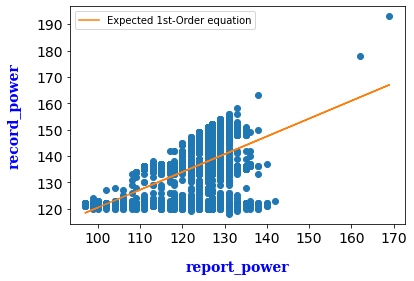

<Figure size 51840x25920 with 0 Axes>

r2 =  0.2261003497091364
1st Order Equation: y = [0.67515655]x + 52.886988407053906 
Total Mean Value of ACTIVE_POWER in Dataset:123.63864864864865


In [64]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
font1 = {'family':'serif','color':'b','weight':'bold','size':14}
x = complete_list44['report_power']
y = complete_list44['record_power']

plt.plot(x,y,'o')
line_fitter = LinearRegression()
line_fitter.fit(x.values.reshape(-1,1),y)
plt.plot(x,line_fitter.predict(x.values.reshape(-1,1)), label = 'Expected 1st-Order equation')
plt.xlabel('report_power', labelpad=15, fontdict=font1)
plt.ylabel('record_power', labelpad=15, fontdict=font1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.figure(figsize=(720,360))
plt.show()
coef = line_fitter.coef_
intercept = line_fitter.intercept_

x1 = sm.add_constant(x)
m = sm.OLS(y,x1)
result = m.fit()
print('r2 = ', result.rsquared)

print('1st Order Equation: y = {}x + {} '.format(coef,intercept))

mean_df1 = complete_list44['report_power'].mean()
print('Total Mean Value of ACTIVE_POWER in Dataset:{}'.format(mean_df1))